**1. Import Libraries**  
**2. Import Data**  
**3. Handling NA and Missing Data**  
**4. Pairplot for Linear Relationships**  
**5. Correlation Analysis**  
**6. Linear Regression Plots**  
**7. Train-Test Split**  
**8. Linear Regression Model**  
**9. Evaluate Model on Training Data**  
**10. Evaluate Model on Test Data:**  
**11. Build Residual Table**  
**12. Actual vs. Predicted Graph**  
**13. Model Assumptions:**  
Check the assumptions of linear regression:
- Linearity: Ensure each predictor variable is linearly related to the outcome variable.
- Normality: Check if the residuals follow a normal distribution.
- Independence: Confirm that each observation is independent.
- Homoscedasticity: Check if the residuals' variance is roughly constant across the model.

**14. Coefficient Table:**  
Build a table that shows the coefficients (slope and intercept) of the regression model for each predictor variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
customers = pd.read_csv(r"..\Ecommerce Customers.txt")
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


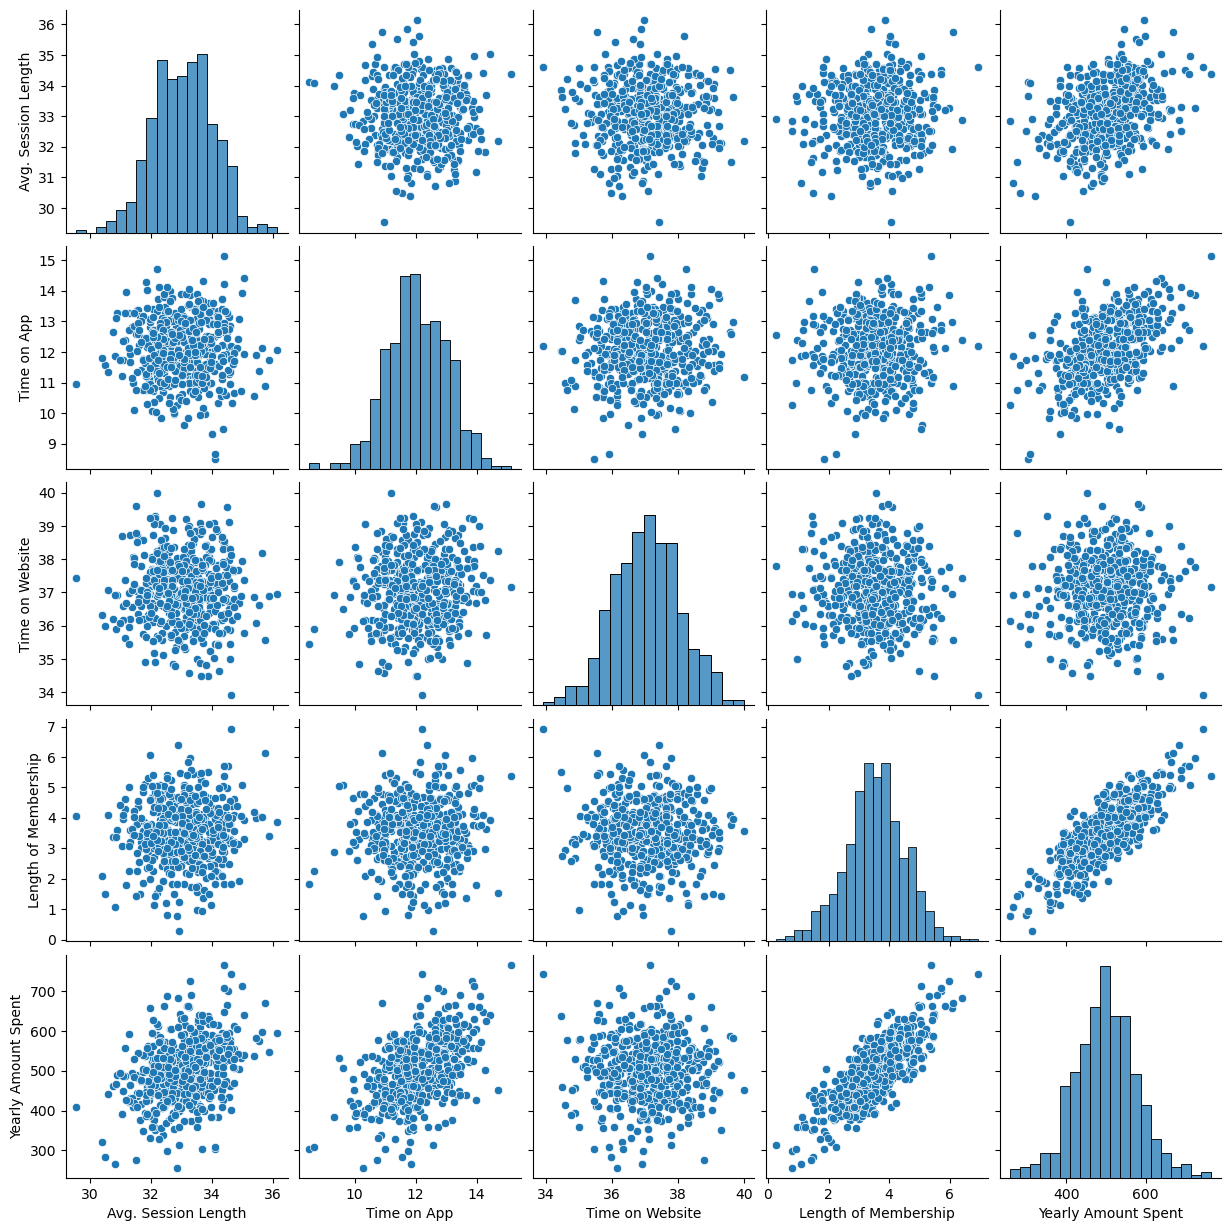

In [5]:
sns.pairplot(customers)

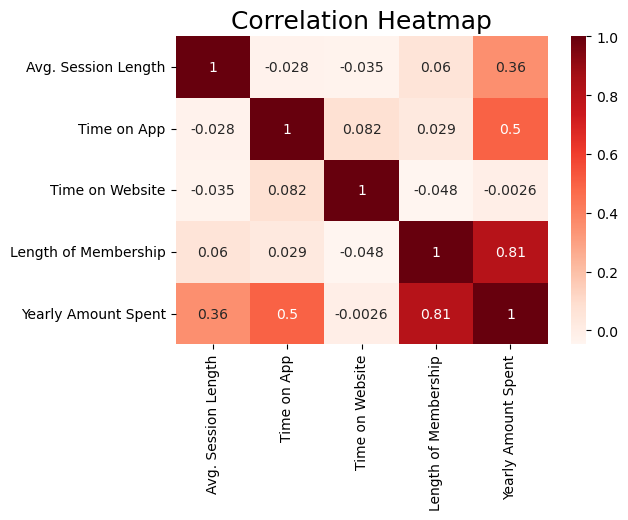

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(customers.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

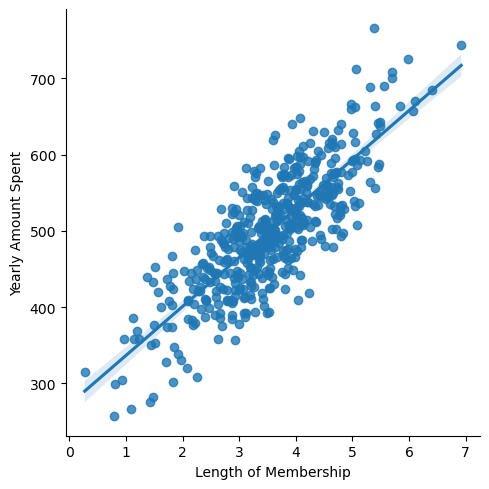

In [7]:
#It looks like you're using Seaborn's lmplot to create a linear regression plot between two variables in your customers DataFrame.#
#The lmplot function in Seaborn creates a scatter plot with a linear regression line fit through the data points.#
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [8]:
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.9817562058732432
R^2: 0.9817562058732432
MAE: 8.18134728734284
MSE: 106.85137432285715
RMSE: 10.336893843068001


In [11]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.9890046246741234
R^2: 0.9890046246741234
MAE: 7.228148653430826
MSE: 79.81305165097437
RMSE: 8.93381506697863


In [12]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 150 entries, 18 to 259
Series name: Yearly Amount Spent
Non-Null Count  Dtype  
--------------  -----  
150 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


In [13]:
results = pd.DataFrame(data={'actual': y_test,
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
18,452.315675,456.441861,-4.126186
361,401.033135,402.720053,-1.686918
104,410.069611,409.253154,0.816457
4,599.406092,591.431034,7.975058
156,586.155870,590.014373,-3.858503


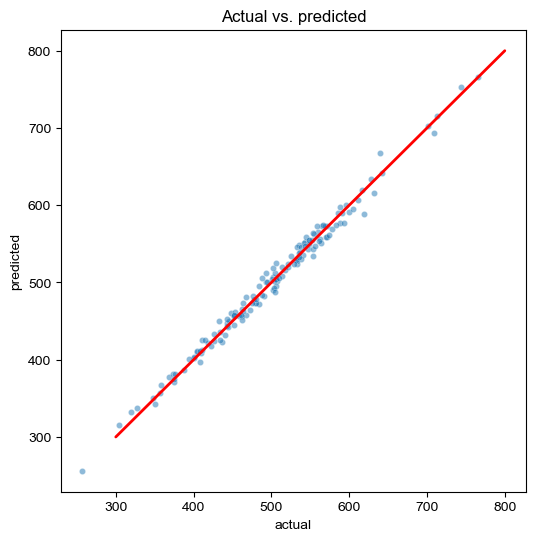

In [14]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([300,800], [300,800], c='red', linewidth=2)
plt.title('Actual vs. predicted');

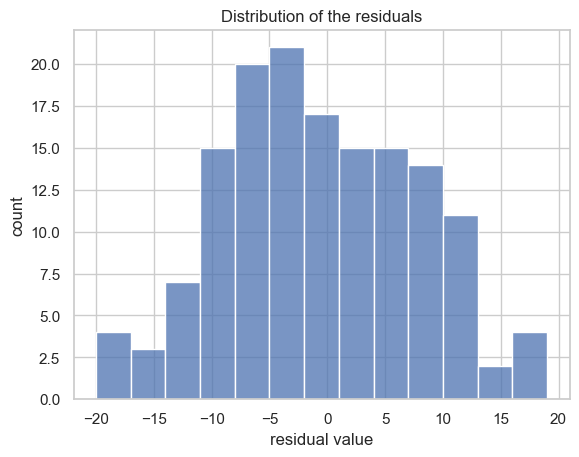

In [15]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-20,20.5,3))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

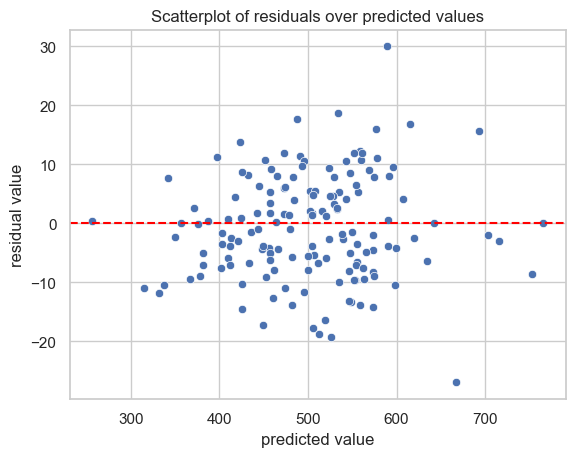

In [16]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red', linestyle='dashed')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

In [17]:
# Create a coefficients DataFrame with coefficients and feature names as columns
coeffecients = pd.DataFrame(lr.coef_, index=X.columns, columns=['Coefficient'])

# Add the intercept term as a new row
coeffecients.loc['Intercept'] = lr.intercept_

coeffecients

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
Intercept,-1047.932782
